In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [3]:
df = pd.read_csv('GOOGL.csv')
df = df.loc[:, ['Open', 'High', 'Close']]

In [4]:
df.head(10)

,Open,High,Close
0,242.742737,243.358353,484.580017
1,243.838837,247.217224,493.000000
2,245.970978,246.421417,487.010010
3,241.306305,241.671677,480.220032
4,240.580582,240.615616,474.880005
5,237.237244,244.444443,482.800018
6,242.252258,248.353348,493.649994
7,248.518524,250.375381,497.570007
8,251.246246,253.588593,506.380035
9,253.623627,260.850861,521.030029


In [5]:
file_name = 'GOOGL_use.csv'
df.to_csv(file_name)

In [6]:
df['High'] = df['High'] / 100
df['Open'] = df['Open'] / 100
df['Close'] = df['Close'] / 100
df.head(5)

,Open,High,Close
0,2.427427,2.433584,4.8458
1,2.438388,2.472172,4.9300
2,2.459710,2.464214,4.8701
3,2.413063,2.416717,4.8022
4,2.405806,2.406156,4.7488


In [7]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [8]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [9]:
window = 22
X_train, y_train, X_test, y_test = load_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1338, 22, 3)
y_train (1338,)
X_test (149, 22, 3)
y_test (149,)


In [10]:
df[::-1].head()

,Open,High,Close
1509,9.6965,9.7930,9.7522
1508,9.5791,9.5995,9.5862
1507,9.4802,9.6068,9.6018
1506,9.7550,9.7970,9.6793
1505,9.7204,9.7791,9.7050


In [11]:
model = build_model2([3,window,1])

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`


In [12]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=500,
    validation_split=0.1,
    verbose=1)

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1204 samples, validate on 134 samples
Epoch 1/500
1204/1204 [==============================] - 3s - loss: 58.8912 - acc: 0.0000e+00 - val_loss: 36.0690 - val_acc: 0.0000e+00
Epoch 2/500
1204/1204 [==============================] - 2s - loss: 58.3111 - acc: 0.0000e+00 - val_loss: 35.5575 - val_acc: 0.0000e+00
Epoch 3/500
1204/1204 [==============================] - 2s - loss: 57.6093 - acc: 0.0000e+00 - val_loss: 34.8622 - val_acc: 0.0000e+00
Epoch 4/500
1204/1204 [==============================] - 2s - loss: 56.7019 - acc: 0.0000e+00 - val_loss: 33.9660 - val_acc: 0.0000e+00
Epoch 5/500
1204/1204 [==============================] - 2s - loss: 55.5182 - acc: 0.0000e+00 - val_loss: 32.7869 - val_acc: 0.0000e+00
Epoch 6/500
1204/1204 [==============================] - 2s - loss: 53.9349 - acc: 0.0000e+00 - val_loss: 31.2115 - val_acc: 0.0000e+00
Epoch 7/500
1204/1204 [==============================] - 2s - loss: 51.8915 - acc: 0.0000e+00 - val_loss: 29.3127 - val_acc: 0.0000e+00
E

1204/1204 [==============================] - 2s - loss: 2.9307 - acc: 0.0000e+00 - val_loss: 2.1539 - val_acc: 0.0000e+00
Epoch 62/500
1204/1204 [==============================] - 1s - loss: 3.0149 - acc: 0.0000e+00 - val_loss: 2.1693 - val_acc: 0.0000e+00
Epoch 63/500
1204/1204 [==============================] - 2s - loss: 2.8809 - acc: 0.0000e+00 - val_loss: 2.1810 - val_acc: 0.0000e+00
Epoch 64/500
1204/1204 [==============================] - 2s - loss: 3.0454 - acc: 0.0000e+00 - val_loss: 2.1798 - val_acc: 0.0000e+00
Epoch 65/500
1204/1204 [==============================] - 2s - loss: 2.9408 - acc: 0.0000e+00 - val_loss: 2.1871 - val_acc: 0.0000e+00
Epoch 66/500
1204/1204 [==============================] - 2s - loss: 3.0001 - acc: 0.0000e+00 - val_loss: 2.1786 - val_acc: 0.0000e+00
Epoch 67/500
1204/1204 [==============================] - 2s - loss: 2.9279 - acc: 0.0000e+00 - val_loss: 2.1769 - val_acc: 0.0000e+00
Epoch 68/500
1204/1204 [==============================] - 2s - loss:

1204/1204 [==============================] - 2s - loss: 2.9036 - acc: 0.0000e+00 - val_loss: 2.1604 - val_acc: 0.0000e+00
Epoch 122/500
1204/1204 [==============================] - 1s - loss: 2.9522 - acc: 0.0000e+00 - val_loss: 2.1513 - val_acc: 0.0000e+00
Epoch 123/500
1204/1204 [==============================] - 2s - loss: 2.9720 - acc: 0.0000e+00 - val_loss: 2.1430 - val_acc: 0.0000e+00
Epoch 124/500
1204/1204 [==============================] - 2s - loss: 2.9637 - acc: 0.0000e+00 - val_loss: 2.1281 - val_acc: 0.0000e+00
Epoch 125/500
1204/1204 [==============================] - 2s - loss: 2.9158 - acc: 0.0000e+00 - val_loss: 2.1257 - val_acc: 0.0000e+00
Epoch 126/500
1204/1204 [==============================] - 1s - loss: 3.0078 - acc: 0.0000e+00 - val_loss: 2.1335 - val_acc: 0.0000e+00
Epoch 127/500
1204/1204 [==============================] - 2s - loss: 2.9428 - acc: 0.0000e+00 - val_loss: 2.1280 - val_acc: 0.0000e+00
Epoch 128/500
1204/1204 [==============================] - 2s 

1204/1204 [==============================] - 2s - loss: 2.9573 - acc: 0.0000e+00 - val_loss: 2.1410 - val_acc: 0.0000e+00
Epoch 182/500
1204/1204 [==============================] - 1s - loss: 2.9118 - acc: 0.0000e+00 - val_loss: 2.1308 - val_acc: 0.0000e+00
Epoch 183/500
1204/1204 [==============================] - 1s - loss: 3.0300 - acc: 0.0000e+00 - val_loss: 2.1207 - val_acc: 0.0000e+00
Epoch 184/500
1204/1204 [==============================] - 2s - loss: 3.0287 - acc: 0.0000e+00 - val_loss: 2.0982 - val_acc: 0.0000e+00
Epoch 185/500
1204/1204 [==============================] - 2s - loss: 2.9178 - acc: 0.0000e+00 - val_loss: 2.0936 - val_acc: 0.0000e+00
Epoch 186/500
1204/1204 [==============================] - 2s - loss: 2.9451 - acc: 0.0000e+00 - val_loss: 2.0952 - val_acc: 0.0000e+00
Epoch 187/500
1204/1204 [==============================] - 2s - loss: 2.9200 - acc: 0.0000e+00 - val_loss: 2.1164 - val_acc: 0.0000e+00
Epoch 188/500
1204/1204 [==============================] - 2s 

1204/1204 [==============================] - 2s - loss: 2.9406 - acc: 0.0000e+00 - val_loss: 2.1784 - val_acc: 0.0000e+00
Epoch 242/500
1204/1204 [==============================] - 2s - loss: 2.9266 - acc: 0.0000e+00 - val_loss: 2.1713 - val_acc: 0.0000e+00
Epoch 243/500
1204/1204 [==============================] - 2s - loss: 3.0202 - acc: 0.0000e+00 - val_loss: 2.1565 - val_acc: 0.0000e+00
Epoch 244/500
1204/1204 [==============================] - 2s - loss: 2.8968 - acc: 0.0000e+00 - val_loss: 2.1538 - val_acc: 0.0000e+00
Epoch 245/500
1204/1204 [==============================] - 2s - loss: 3.0325 - acc: 0.0000e+00 - val_loss: 2.1260 - val_acc: 0.0000e+00
Epoch 246/500
1204/1204 [==============================] - 2s - loss: 2.9141 - acc: 0.0000e+00 - val_loss: 2.0891 - val_acc: 0.0000e+00
Epoch 247/500
1204/1204 [==============================] - 2s - loss: 3.0459 - acc: 0.0000e+00 - val_loss: 2.0483 - val_acc: 0.0000e+00
Epoch 248/500
1204/1204 [==============================] - 2s 

1204/1204 [==============================] - 2s - loss: 2.9555 - acc: 0.0000e+00 - val_loss: 2.0965 - val_acc: 0.0000e+00
Epoch 302/500
1204/1204 [==============================] - 1s - loss: 2.9414 - acc: 0.0000e+00 - val_loss: 2.1125 - val_acc: 0.0000e+00
Epoch 303/500
1204/1204 [==============================] - 2s - loss: 2.9791 - acc: 0.0000e+00 - val_loss: 2.1519 - val_acc: 0.0000e+00
Epoch 304/500
1204/1204 [==============================] - 2s - loss: 2.9451 - acc: 0.0000e+00 - val_loss: 2.2091 - val_acc: 0.0000e+00
Epoch 305/500
1204/1204 [==============================] - 2s - loss: 2.9638 - acc: 0.0000e+00 - val_loss: 2.2340 - val_acc: 0.0000e+00
Epoch 306/500
1204/1204 [==============================] - 2s - loss: 2.9399 - acc: 0.0000e+00 - val_loss: 2.2083 - val_acc: 0.0000e+00
Epoch 307/500
1204/1204 [==============================] - 2s - loss: 3.0023 - acc: 0.0000e+00 - val_loss: 2.1820 - val_acc: 0.0000e+00
Epoch 308/500
1204/1204 [==============================] - 2s 

1204/1204 [==============================] - 2s - loss: 3.0366 - acc: 0.0000e+00 - val_loss: 2.1518 - val_acc: 0.0000e+00
Epoch 362/500
1204/1204 [==============================] - 2s - loss: 2.9428 - acc: 0.0000e+00 - val_loss: 2.1626 - val_acc: 0.0000e+00
Epoch 363/500
1204/1204 [==============================] - 2s - loss: 2.9639 - acc: 0.0000e+00 - val_loss: 2.1462 - val_acc: 0.0000e+00
Epoch 364/500
1204/1204 [==============================] - 2s - loss: 2.9126 - acc: 0.0000e+00 - val_loss: 2.1395 - val_acc: 0.0000e+00
Epoch 365/500
1204/1204 [==============================] - 2s - loss: 2.9670 - acc: 0.0000e+00 - val_loss: 2.1641 - val_acc: 0.0000e+00
Epoch 366/500
1204/1204 [==============================] - 2s - loss: 3.0246 - acc: 0.0000e+00 - val_loss: 2.1751 - val_acc: 0.0000e+00
Epoch 367/500
1204/1204 [==============================] - 2s - loss: 2.9058 - acc: 0.0000e+00 - val_loss: 2.1673 - val_acc: 0.0000e+00
Epoch 368/500
1204/1204 [==============================] - 2s 

1204/1204 [==============================] - 2s - loss: 3.0014 - acc: 0.0000e+00 - val_loss: 2.1258 - val_acc: 0.0000e+00
Epoch 422/500
1204/1204 [==============================] - 2s - loss: 2.9291 - acc: 0.0000e+00 - val_loss: 2.1328 - val_acc: 0.0000e+00
Epoch 423/500
1204/1204 [==============================] - 2s - loss: 2.9857 - acc: 0.0000e+00 - val_loss: 2.1457 - val_acc: 0.0000e+00
Epoch 424/500
1204/1204 [==============================] - 2s - loss: 2.9537 - acc: 0.0000e+00 - val_loss: 2.1792 - val_acc: 0.0000e+00
Epoch 425/500
1204/1204 [==============================] - 2s - loss: 2.9229 - acc: 0.0000e+00 - val_loss: 2.2027 - val_acc: 0.0000e+00
Epoch 426/500
1204/1204 [==============================] - 1s - loss: 2.9097 - acc: 0.0000e+00 - val_loss: 2.1389 - val_acc: 0.0000e+00
Epoch 427/500
1204/1204 [==============================] - 2s - loss: 3.0386 - acc: 0.0000e+00 - val_loss: 2.0624 - val_acc: 0.0000e+00
Epoch 428/500
1204/1204 [==============================] - 2s 

1204/1204 [==============================] - 2s - loss: 2.9822 - acc: 0.0000e+00 - val_loss: 2.1912 - val_acc: 0.0000e+00
Epoch 482/500
1204/1204 [==============================] - 2s - loss: 2.9038 - acc: 0.0000e+00 - val_loss: 2.1798 - val_acc: 0.0000e+00
Epoch 483/500
1204/1204 [==============================] - 2s - loss: 2.9665 - acc: 0.0000e+00 - val_loss: 2.1484 - val_acc: 0.0000e+00
Epoch 484/500
1204/1204 [==============================] - 2s - loss: 2.9183 - acc: 0.0000e+00 - val_loss: 2.1305 - val_acc: 0.0000e+00
Epoch 485/500
1204/1204 [==============================] - 2s - loss: 2.9477 - acc: 0.0000e+00 - val_loss: 2.1430 - val_acc: 0.0000e+00
Epoch 486/500
1204/1204 [==============================] - 2s - loss: 3.0110 - acc: 0.0000e+00 - val_loss: 2.1545 - val_acc: 0.0000e+00
Epoch 487/500
1204/1204 [==============================] - 2s - loss: 2.9600 - acc: 0.0000e+00 - val_loss: 2.1916 - val_acc: 0.0000e+00
Epoch 488/500
1204/1204 [==============================] - 2s 

In [13]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 2.69 MSE (1.64 RMSE)
Test Score: 3.20 MSE (1.79 RMSE)


In [14]:
print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

[[ 3.02997986  3.10060059  6.18230042]
 [ 2.97312317  3.0433432   6.0698999 ]
 [ 3.01391388  3.01716705  5.95349976]
 [ 2.98368378  3.02642639  6.02549988]
 [ 2.96541534  3.01326324  5.94940002]
 [ 2.99049042  3.00425415  5.97619995]
 [ 2.69829834  2.71271271  5.28940002]
 [ 2.68768768  2.72272278  5.3826001 ]
 [ 2.6434433   2.6997998   5.3401001 ]
 [ 2.6435434   2.6825827   5.27280029]
 [ 2.6674173   2.69094086  5.3198999 ]
 [ 2.70770782  2.75615601  5.46600037]
 [ 2.67017029  2.69524536  5.35359985]
 [ 2.62912903  2.67967957  5.32440002]
 [ 2.53623627  2.60850861  5.21030029]
 [ 2.51246246  2.53588593  5.06380035]
 [ 2.48518524  2.50375381  4.97570007]
 [ 2.42252258  2.48353348  4.93649994]
 [ 2.37237244  2.44444443  4.82800018]
 [ 2.40580582  2.40615616  4.74880005]
 [ 2.41306305  2.41671677  4.80220032]
 [ 2.45970978  2.46421417  4.8701001 ]]
0 5.85519958 7.46097 -0.215223185321 1.60577463646
1 5.85990051 7.46097 -0.214593116128 1.60107370646
2 6.39570007 7.46097 -0.142779497094 1.

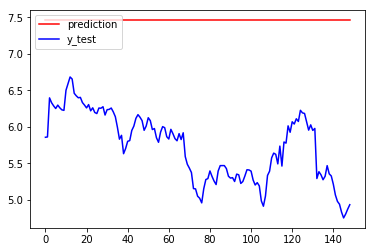

In [15]:
import matplotlib.pyplot as plt

plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()